In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/WELFake_Dataset.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


In [30]:
import pandas as pd
file_path = '/content/drive/MyDrive/WELFake_Dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [31]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [32]:
df.dropna()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [33]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [34]:
df.drop(columns=['Unnamed: 0','text'],inplace=True)

In [35]:
df.head()

,title,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,NaN,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1


In [36]:
import pandas as pd

# Assuming df is your DataFrame
# Replace "old_column_names" and "new_column_names" with your actual column names
old_column_names = ['title', 'label']  # Example old column names
new_column_names = ['data', 'label']  # Example new column names

# Rename the columns
df.rename(columns=dict(zip(old_column_names, new_column_names)), inplace=True)

# Now you can check the new column names
print(df.columns)


Index(['data', 'label'], dtype='object')


<Axes: ylabel='count'>

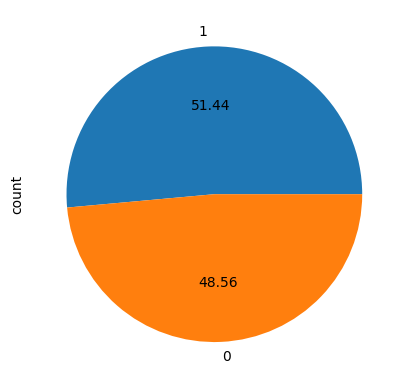

In [37]:
# 0 - Fake, 1 - Real
df['label'].value_counts().plot.pie(autopct='%.2f')

#### Thus, we have balanced data

In [38]:
X = df.drop(columns=['label'])
y = df['label']

In [39]:
X.head()

,data
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,NaN
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...


In [40]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [41]:
print(X.shape)
print(y.shape)

(72134, 1)
(72134,)


In [ ]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [ ]:
# Vocab_size = Unique words in our Corpus (entire document)
vocab_size = 10000

In [ ]:
messages = X.copy()

# We have to reset index as we have used dropna() earlier, otherwise it will throw an error
messages.reset_index(inplace=True)

In [ ]:
messages['title'][1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

In [42]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

ps = PorterStemmer()
corpus = []

# Ensure df['data'][i] is a string
for i in range(0, len(df)):
    if isinstance(df['data'][i], str):
        review = df['data'][i]
    else:
        review = str(df['data'][i])

    # We are substituting everything apart from (a-z, A-Z) with a " " (space)
    review = re.sub('[^a-zA-Z]', ' ', review)

    review = review.lower()
    review = review.split()

    # if a word is not in Stop Words,then only we will add it to review (list/array)
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [44]:
df['data'] = corpus

In [ ]:
corpus

In [46]:
df.isna().sum()

data     0
label    0
dtype: int64

In [47]:
combined_condition = df['data'].str.contains('nan', case=False, na=False)
df = df[~combined_condition]

In [48]:
df

,data,label
0,law enforc high alert follow threat cop white ...,1
2,unbeliev obama attorney gener say charlott rio...,1
3,bobbi jindal rais hindu use stori christian co...,0
4,satan russia unv imag terrifi new supernuk wes...,1
5,time christian group sue amazon splc design ha...,1
...,...,...
72129,russian steal research trump hack u democrat p...,0
72130,watch giuliani demand democrat apolog trump ra...,1
72131,migrant refus leav train refuge camp hungari,0
72132,trump tussl give unpopular mexican leader much...,0


In [28]:
df = df.dropna(subset=['data'])
df

,data,label
0,law enforc high alert follow threat cop white ...,1
1,nan,1
2,unbeliev obama attorney gener say charlott rio...,1
3,bobbi jindal rais hindu use stori christian co...,0
4,satan russia unv imag terrifi new supernuk wes...,1
...,...,...
72129,russian steal research trump hack u democrat p...,0
72130,watch giuliani demand democrat apolog trump ra...,1
72131,migrant refus leav train refuge camp hungari,0
72132,trump tussl give unpopular mexican leader much...,0


In [50]:
df

,data,label
0,law enforc high alert follow threat cop white ...,1
2,unbeliev obama attorney gener say charlott rio...,1
3,bobbi jindal rais hindu use stori christian co...,0
4,satan russia unv imag terrifi new supernuk wes...,1
5,time christian group sue amazon splc design ha...,1
...,...,...
72129,russian steal research trump hack u democrat p...,0
72130,watch giuliani demand democrat apolog trump ra...,1
72131,migrant refus leav train refuge camp hungari,0
72132,trump tussl give unpopular mexican leader much...,0


In [51]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Save DataFrame to CSV in Google Drive
df.to_csv("/content/drive/My Drive/WELFake_Dataset.csv", index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
corpus[:30]

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
 'satan russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trump russia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl alt right nazi internet',
 'may brexit offer would hurt cost eu citizen eu parliament',
 'schumer call trump appoint offici overse puerto rico relief',
 'watch hilari ad call question health age clinton crime famili boss',
 'chang expect espn polit agenda despit huge subscrib declin breitbart'

In [ ]:
max_length = max(len(sentence.split()) for sentence in corpus)

print("Maximum sentence length:", max_length)

Maximum sentence length: 47


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Here, we are converting the text (Corpus) into One Hot Representation for the given vocabulary size (i.e. 10000)
onehot_repr=[one_hot(words,vocab_size) for words in corpus]

In [ ]:
# Note: The one hot representation returns the indexes assigned to a particular word
onehot_repr[:5]

[[2719, 3052, 1479, 3844, 9524, 6801, 2451, 8182, 5781, 877, 6492, 1284],
 [2856,
  7916,
  1165,
  6981,
  5920,
  1855,
  8327,
  9986,
  6614,
  6519,
  76,
  3319,
  8592,
  1284],
 [5053, 9763, 140, 2079, 2677, 3404, 411, 7832, 9954, 6740, 543, 8247],
 [1232, 1633, 9162, 5347, 2398, 9473, 1132, 6173, 4012, 2826, 5988],
 [8485, 411, 6063, 6776, 4828, 1663, 1015, 3847, 6063]]

### **Embedding**

In [ ]:
sentence_length = 50

# Adding padding to sentences so that all sentences are of same length i.e 50, to avoid varying input sizes
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sentence_length)
print(embedded_docs)

[[   0    0    0 ...  877 6492 1284]
 [   0    0    0 ... 3319 8592 1284]
 [   0    0    0 ... 6740  543 8247]
 ...
 [   0    0    0 ... 7308 4994 8481]
 [   0    0    0 ... 1417 1451 9495]
 [   0    0    0 ... 1219 1967 1205]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 2719, 3052, 1479, 3844, 9524, 6801,
       2451, 8182, 5781,  877, 6492, 1284], dtype=int32)

## **LSTM Model**

In [ ]:
embedding_vector_features=100 # We will have a vector representation to text with only 100 features

model=Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=sentence_length))
model.add(LSTM(100))
model.add(Dropout(0.2))

# LSTM layer (output) is fully connected to the Dense layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1080501 (4.12 MB)
Trainable params: 1080501 (4.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
X_final = np.array(embedded_docs)
y_final = np.array(y)
X_final.shape,y_final.shape

((71537, 50), (71537,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [ ]:
# Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1789/1789 [==============================] - 37s 19ms/step - loss: 0.2769 - accuracy: 0.8796 - val_loss: 0.2283 - val_accuracy: 0.9049
Epoch 2/10
1789/1789 [==============================] - 14s 8ms/step - loss: 0.1855 - accuracy: 0.9254 - val_loss: 0.2447 - val_accuracy: 0.9024
Epoch 3/10
1789/1789 [==============================] - 13s 7ms/step - loss: 0.1433 - accuracy: 0.9432 - val_loss: 0.2584 - val_accuracy: 0.9024
Epoch 4/10
1789/1789 [==============================] - 12s 7ms/step - loss: 0.1101 - accuracy: 0.9566 - val_loss: 0.2894 - val_accuracy: 0.9027
Epoch 5/10
1789/1789 [==============================] - 12s 7ms/step - loss: 0.0809 - accuracy: 0.9683 - val_loss: 0.3458 - val_accuracy: 0.8998
Epoch 6/10
1789/1789 [==============================] - 13s 7ms/step - loss: 0.0586 - accuracy: 0.9770 - val_loss: 0.3987 - val_accuracy: 0.8967
Epoch 7/10
1789/1789 [==============================] - 14s 8ms/step - loss: 0.0451 - accuracy: 0.9831 - val_loss: 0.4736 - val_a

### Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

acc = accuracy_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

448/448 [==============================] - 2s 3ms/step
[[6379  702]
 [ 733 6494]]


In [ ]:
print(acc)

0.899706457925636


## **STACKED LSTM MODEL**

In [ ]:
embedding_vector_features=100
model1=Sequential()
model1.add(Embedding(vocab_size, embedding_vector_features, input_length=sentence_length))
model1.add(LSTM(100,return_sequences=True))
model1.add(Dropout(0.2))

model1.add(LSTM(50,return_sequences=True))
model1.add(Dropout(0.1))

model1.add(LSTM(20))
model1.add(Dropout(0.1))

model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 lstm_1 (LSTM)               (None, 50, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            30200     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                5680      
                                                                 
 dropout_3 (Dropout)         (None, 20)               

In [ ]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1789/1789 [==============================] - 44s 21ms/step - loss: 0.2856 - accuracy: 0.8746 - val_loss: 0.2315 - val_accuracy: 0.9030
Epoch 2/10
1789/1789 [==============================] - 24s 14ms/step - loss: 0.1895 - accuracy: 0.9248 - val_loss: 0.2295 - val_accuracy: 0.9056
Epoch 3/10
1789/1789 [==============================] - 23s 13ms/step - loss: 0.1460 - accuracy: 0.9429 - val_loss: 0.2581 - val_accuracy: 0.9023
Epoch 4/10
1789/1789 [==============================] - 23s 13ms/step - loss: 0.1131 - accuracy: 0.9560 - val_loss: 0.2679 - val_accuracy: 0.9033
Epoch 5/10
1789/1789 [==============================] - 23s 13ms/step - loss: 0.0842 - accuracy: 0.9674 - val_loss: 0.3209 - val_accuracy: 0.9019
Epoch 6/10
1789/1789 [==============================] - 24s 13ms/step - loss: 0.0615 - accuracy: 0.9766 - val_loss: 0.3601 - val_accuracy: 0.9042
Epoch 7/10
1789/1789 [==============================] - 24s 13ms/step - loss: 0.0453 - accuracy: 0.9830 - val_loss: 0.3936 -

In [ ]:
y_log_1 = model1.predict(X_test)
y_pred_1 = np.where(y_log_1>0.5,1,0)

acc_1 = accuracy_score(y_test, y_pred_1)
print(acc_1)

print()

confusion_mat_1 = confusion_matrix(y_test, y_pred_1)
print(confusion_mat_1)

448/448 [==============================] - 3s 5ms/step
0.8998462398658094

[[6317  764]
 [ 669 6558]]


## **Bi-Directional LSTM Model**

In [ ]:
embedding_vector_features=150
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_vector_features, input_length=sentence_length))
model2.add(Bidirectional(LSTM(200)))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 150)           1500000   
                                                                 
 bidirectional (Bidirection  (None, 400)               561600    
 al)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 2062001 (7.87 MB)
Trainable params: 2062001 (7.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10, batch_size=120)

Epoch 1/10
477/477 [==============================] - 38s 70ms/step - loss: 0.3130 - accuracy: 0.8666 - val_loss: 0.2432 - val_accuracy: 0.8966
Epoch 2/10
477/477 [==============================] - 11s 23ms/step - loss: 0.1966 - accuracy: 0.9213 - val_loss: 0.2334 - val_accuracy: 0.9049
Epoch 3/10
477/477 [==============================] - 9s 19ms/step - loss: 0.1636 - accuracy: 0.9358 - val_loss: 0.2463 - val_accuracy: 0.9032
Epoch 4/10
477/477 [==============================] - 8s 16ms/step - loss: 0.1369 - accuracy: 0.9471 - val_loss: 0.2740 - val_accuracy: 0.8999
Epoch 5/10
477/477 [==============================] - 8s 17ms/step - loss: 0.1125 - accuracy: 0.9562 - val_loss: 0.2945 - val_accuracy: 0.8987
Epoch 6/10
477/477 [==============================] - 8s 17ms/step - loss: 0.0928 - accuracy: 0.9635 - val_loss: 0.3309 - val_accuracy: 0.8993
Epoch 7/10
477/477 [==============================] - 8s 16ms/step - loss: 0.0750 - accuracy: 0.9712 - val_loss: 0.3936 - val_accuracy: 0.89

In [ ]:
y_log_2 = model2.predict(X_test)
y_pred_2 = np.where(y_log_2>0.5,1,0)

acc_2 = accuracy_score(y_test, y_pred_2)
print(acc_2)

print()

confusion_mat_2 = confusion_matrix(y_test, y_pred_2)
print(confusion_mat_2)

448/448 [==============================] - 2s 4ms/step
0.8942549622588761

[[6162  919]
 [ 594 6633]]
